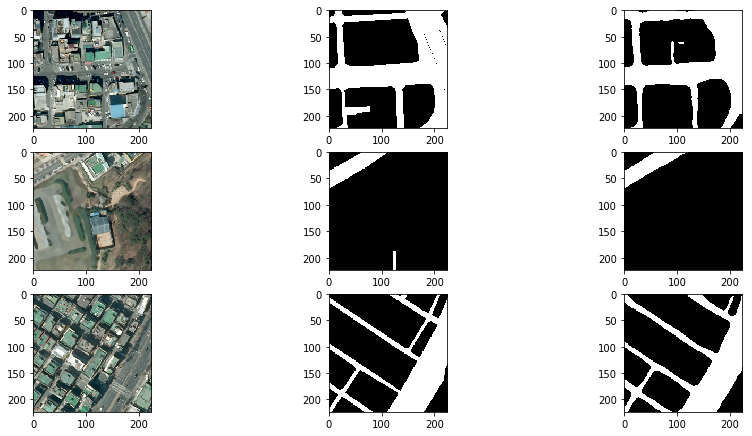

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as Funct
import sys
from collections import OrderedDict
import segData
from PIL import Image
from torchvision.transforms import ToPILImage
import torchvision.transforms as t
to_img = t.ToPILImage()
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2,3"

if __name__ == "__main__":
    from segmentation import Unet
    from segmentation import Up_Block
    from segmentation import Get_Sample
    from segmentation import ConvBlock
    import torch.optim as optim
    from torch.autograd import Variable
    from torch.utils.data import DataLoader
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    def norm(x):
        return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))
    
    
    test_dataset = DataLoader(
        segData.DataS("val"),
        batch_size=4, shuffle=False, num_workers=4)    
    dataiter = iter(test_dataset)
    inputs, labels = dataiter.next()
    model = torch.load('5_epoch_model.pt')
    
    inputs = inputs.cuda()
    outputs = model(Variable(inputs))
    inputs = inputs.cpu().numpy()
    inputs = np.transpose(inputs,(0, 2, 3, 1))

    labels = labels.numpy()
    labels = np.transpose(labels,(0, 2, 3, 1))
    labels = 255 * labels
    
    outputs = (outputs.data).cpu().numpy()
    outputs = np.transpose(outputs,(0, 2, 3, 1))
    outputs = 255 * outputs
    fig = plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(431 + 3 * i)
        plt.imshow(inputs[i], interpolation='nearest')        
        plt.subplot(432 + 3 * i)
        label = to_img(labels[i])   
        plt.imshow(label,interpolation='nearest', cmap = "gray")        
        plt.subplot(433 + 3 * i)
        output = to_img(outputs[i]) 
        plt.imshow(np.array(output), interpolation='nearest', cmap = "gray")
    plt.show()